In [2]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    consumer_key = '9djiBujIhjpIOrzw9LqtGuFh8'
    consumer_secret = 'gi798ZXa8YA7hH4dFw4zBGkKSGPd6qXmATcvQDGRnF5Qb6zSN7'
    access_token = '758556758633811968-v4mRTEokErBRKdcJG5Uu7JuMjIFfx7u'
    access_token_secret = 'k2oOoArJnuix017qJPz6ZkS6krAU6veL2kHU0i4Fv60pn'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth,wait_on_rate_limit=True)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="narendramodi", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

Number of tweets extracted: 200.



In [5]:
# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

5 recent tweets:

Warmest congratulations and good wishes to His Excellency U Win Myint on his election as President of the Republic… https://t.co/veUiwyzFxY

RT @vijayrupanibjp: "माधव से माधवपुर"  
#MadhavpurMela 
#EkBharatShreshthaBharat https://t.co/hNABmWJU5C

Attended the farewell function for Rajya Sabha MPs who are retiring. I appreciate their contribution to Parliament… https://t.co/cRfQ77cZlU

RT @rajyasabhatv: PM Modi bids farewell to retiring members of Rajya Sabha: https://t.co/5fzWrzordD via @YouTube

Joined the ceremony marking the presentation of the Gallantry Awards and Distinguished Service Decorations at Rasht… https://t.co/V5AC0iDT7A



In [6]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Warmest congratulations and good wishes to His...
1,"RT @vijayrupanibjp: ""माधव से माधवपुर"" \n#Madh..."
2,Attended the farewell function for Rajya Sabha...
3,RT @rajyasabhatv: PM Modi bids farewell to ret...
4,Joined the ceremony marking the presentation o...
5,RT @vijayrupanibjp: Fairs in Gujarat symbolize...
6,RT @vijayrupanibjp: Felt the divine presence d...
7,RT @vijayrupanibjp: At Porbandar with CM Aruna...
8,RT @dr_maheshsharma: माधवपुर की पावन माटी को म...
9,RT @dr_maheshsharma: At the historical #Madhav...


In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

978946595331993600
2018-03-28 10:47:10
Twitter Web Client
5710
1092
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/veUiwyzFxY', 'expanded_url': 'https://twitter.com/i/web/status/978946595331993600', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}


In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])


In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs
0,Warmest congratulations and good wishes to His...,139,978946595331993600,2018-03-28 10:47:10,Twitter Web Client,5710,1092
1,"RT @vijayrupanibjp: ""माधव से माधवपुर"" \n#Madh...",104,978686233139298304,2018-03-27 17:32:35,Twitter for iPhone,0,981
2,Attended the farewell function for Rajya Sabha...,139,978684549210107904,2018-03-27 17:25:54,Twitter for iPhone,8664,1642
3,RT @rajyasabhatv: PM Modi bids farewell to ret...,112,978683994375012352,2018-03-27 17:23:41,Twitter for iPhone,0,384
4,Joined the ceremony marking the presentation o...,140,978683771833561088,2018-03-27 17:22:48,Twitter for iPhone,7107,1627
5,RT @vijayrupanibjp: Fairs in Gujarat symbolize...,140,978682992489975808,2018-03-27 17:19:43,Twitter for iPhone,0,885
6,RT @vijayrupanibjp: Felt the divine presence d...,140,978682958138589184,2018-03-27 17:19:34,Twitter for iPhone,0,603
7,RT @vijayrupanibjp: At Porbandar with CM Aruna...,140,978682891105312768,2018-03-27 17:19:18,Twitter for iPhone,0,545
8,RT @dr_maheshsharma: माधवपुर की पावन माटी को म...,139,978682794275692544,2018-03-27 17:18:55,Twitter for iPhone,0,499
9,RT @dr_maheshsharma: At the historical #Madhav...,139,978682756938027013,2018-03-27 17:18:46,Twitter for iPhone,0,601


In [12]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

In [13]:
mean

126.11

In [14]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is:")
print((data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is:")
print((data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is:
Professor Stephen Hawking was an outstanding scientist and academic. His grit and tenacity inspired people all over… https://t.co/iAZ4vdIuVN
Number of likes: 54479
140 characters.

The tweet with more retweets is:
नव संवत्सर और नवरात्रि की सभी देशवासियों को हार्दिक शुभकामनाएं। विक्रम संवत 2075 सबके जीवन में सुख, समृद्धि और अच्छा स्वास्थ्य लेकर लाए।
Number of retweets: 11287
136 characters.



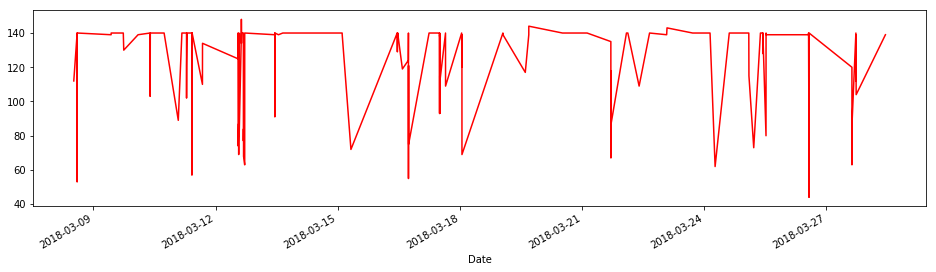

In [15]:
#Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.
# We create time series for data:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

tlen.plot(figsize=(16,4), color='r');

In [15]:
plt.show()

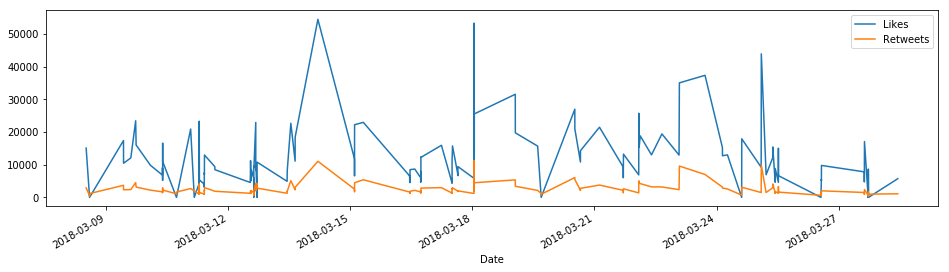

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);
plt.show()

In [17]:
#Pie charts of sources
#We're almost done with this second section of the post. Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source. We first clean all the sources:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* Twitter for iPhone
* Media Studio


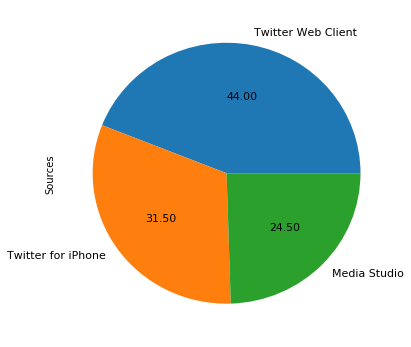

In [18]:
#We now count the number of each source and create a pie chart. 
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [19]:
#Sentiment analysis
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [20]:
#Textblob can work with different machine learning models used in natural language processing. 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1



In [21]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Warmest congratulations and good wishes to His...,139,978946595331993600,2018-03-28 10:47:10,Twitter Web Client,5710,1092,1
1,"RT @vijayrupanibjp: ""माधव से माधवपुर"" \n#Madh...",104,978686233139298304,2018-03-27 17:32:35,Twitter for iPhone,0,981,0
2,Attended the farewell function for Rajya Sabha...,139,978684549210107904,2018-03-27 17:25:54,Twitter for iPhone,8664,1642,0
3,RT @rajyasabhatv: PM Modi bids farewell to ret...,112,978683994375012352,2018-03-27 17:23:41,Twitter for iPhone,0,384,0
4,Joined the ceremony marking the presentation o...,140,978683771833561088,2018-03-27 17:22:48,Twitter for iPhone,7107,1627,0
5,RT @vijayrupanibjp: Fairs in Gujarat symbolize...,140,978682992489975808,2018-03-27 17:19:43,Twitter for iPhone,0,885,1
6,RT @vijayrupanibjp: Felt the divine presence d...,140,978682958138589184,2018-03-27 17:19:34,Twitter for iPhone,0,603,0
7,RT @vijayrupanibjp: At Porbandar with CM Aruna...,140,978682891105312768,2018-03-27 17:19:18,Twitter for iPhone,0,545,0
8,RT @dr_maheshsharma: माधवपुर की पावन माटी को म...,139,978682794275692544,2018-03-27 17:18:55,Twitter for iPhone,0,499,0
9,RT @dr_maheshsharma: At the historical #Madhav...,139,978682756938027013,2018-03-27 17:18:46,Twitter for iPhone,0,601,0


In [22]:
#Analyzing the results
#To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [23]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))


Percentage of positive tweets: 42.5%
Percentage of neutral tweets: 53.5%
Percentage de negative tweets: 4.0%
